#### importing libraries :


In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import cmath
from scipy import stats
import seaborn as sns
sns.set(color_codes=True)
import warnings
warnings.filterwarnings("ignore")
from matplotlib import patches

## [1] Z Transform:

#### a) Consider the discrete time sequence x[n] = z^n with −∞ < n < ∞ where z ∈ C.. Let
z = 0.95, 
z = 1.05,
z = −1.05, 
z = −0.97, 
z = 1,
z = −1.
Now plot the sequences for different values of z. For each plot what is the nature of the plot?

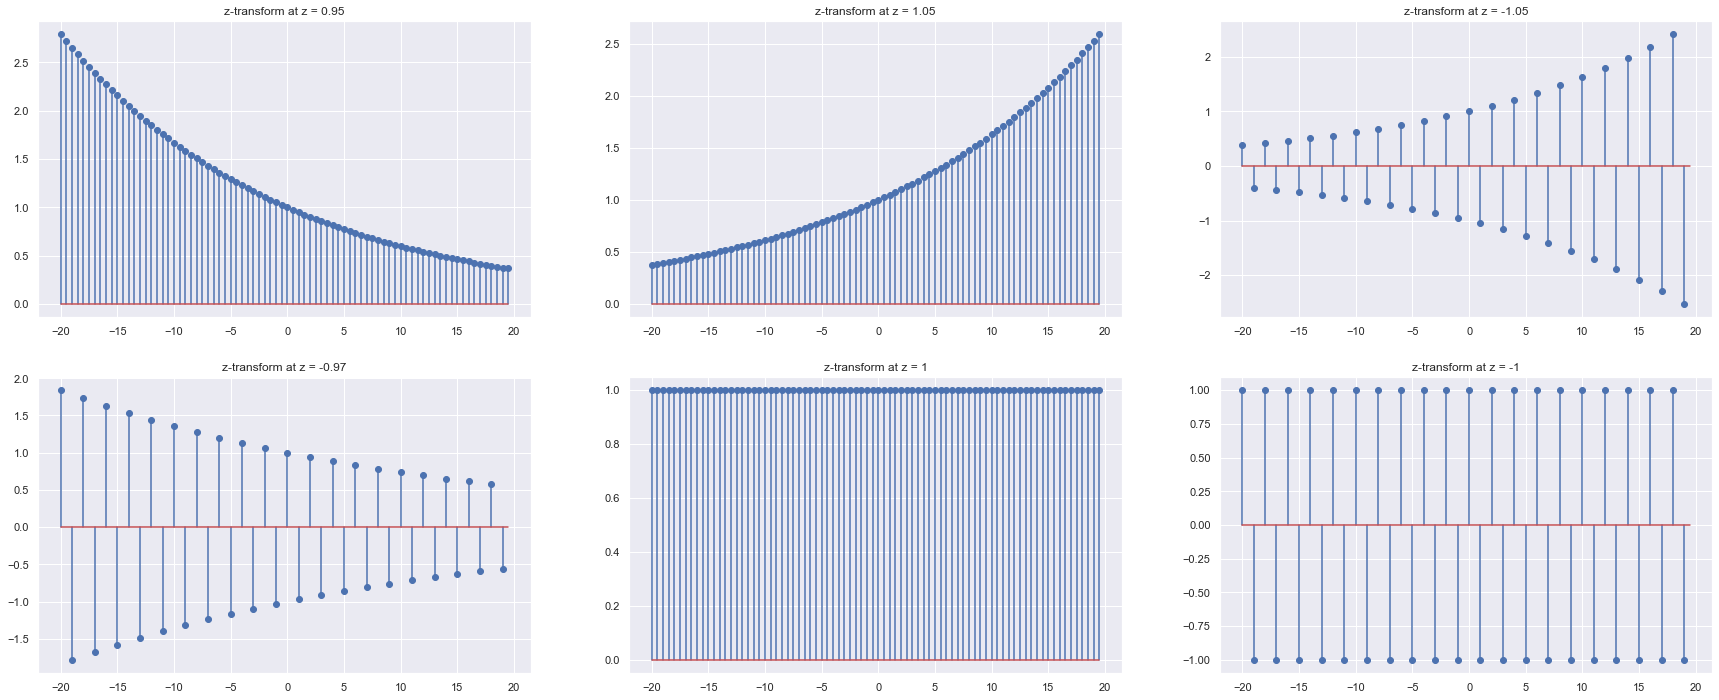

In [55]:
def ztrans(n,data):
    z = [data**i for i in n ]
    return z
n  = np.arange(-20,20,0.5)
lst =[ztrans(n,0.95),ztrans(n,1.05),ztrans(n,-1.05),ztrans(n,-0.97),ztrans(n,1),ztrans(n,-1)]
name = ["0.95","1.05","-1.05","-0.97","1","-1"]
fig , ax = plt.subplots(nrows = 2, ncols = 3,figsize=(30,12))
c =1
for i in range(len(lst)):
    plt.subplot(2,3,c)
    plt.stem(n,lst[i])
    plt.title("z-transform at z = " +str(name[i]))
    c = c+1

#### b)  Now consider the same sequence with complex values of z.  Consider 
z = −2 + 3j,
z = 2 − 3j,
z = e^jπ/10 , 
z = 0.95(e^jπ/10),
z = 1.05(e^jπ/10).
For these values of z create 3D plot with both real and imaginary parts.
Try using different markers for real and imaginary parts.


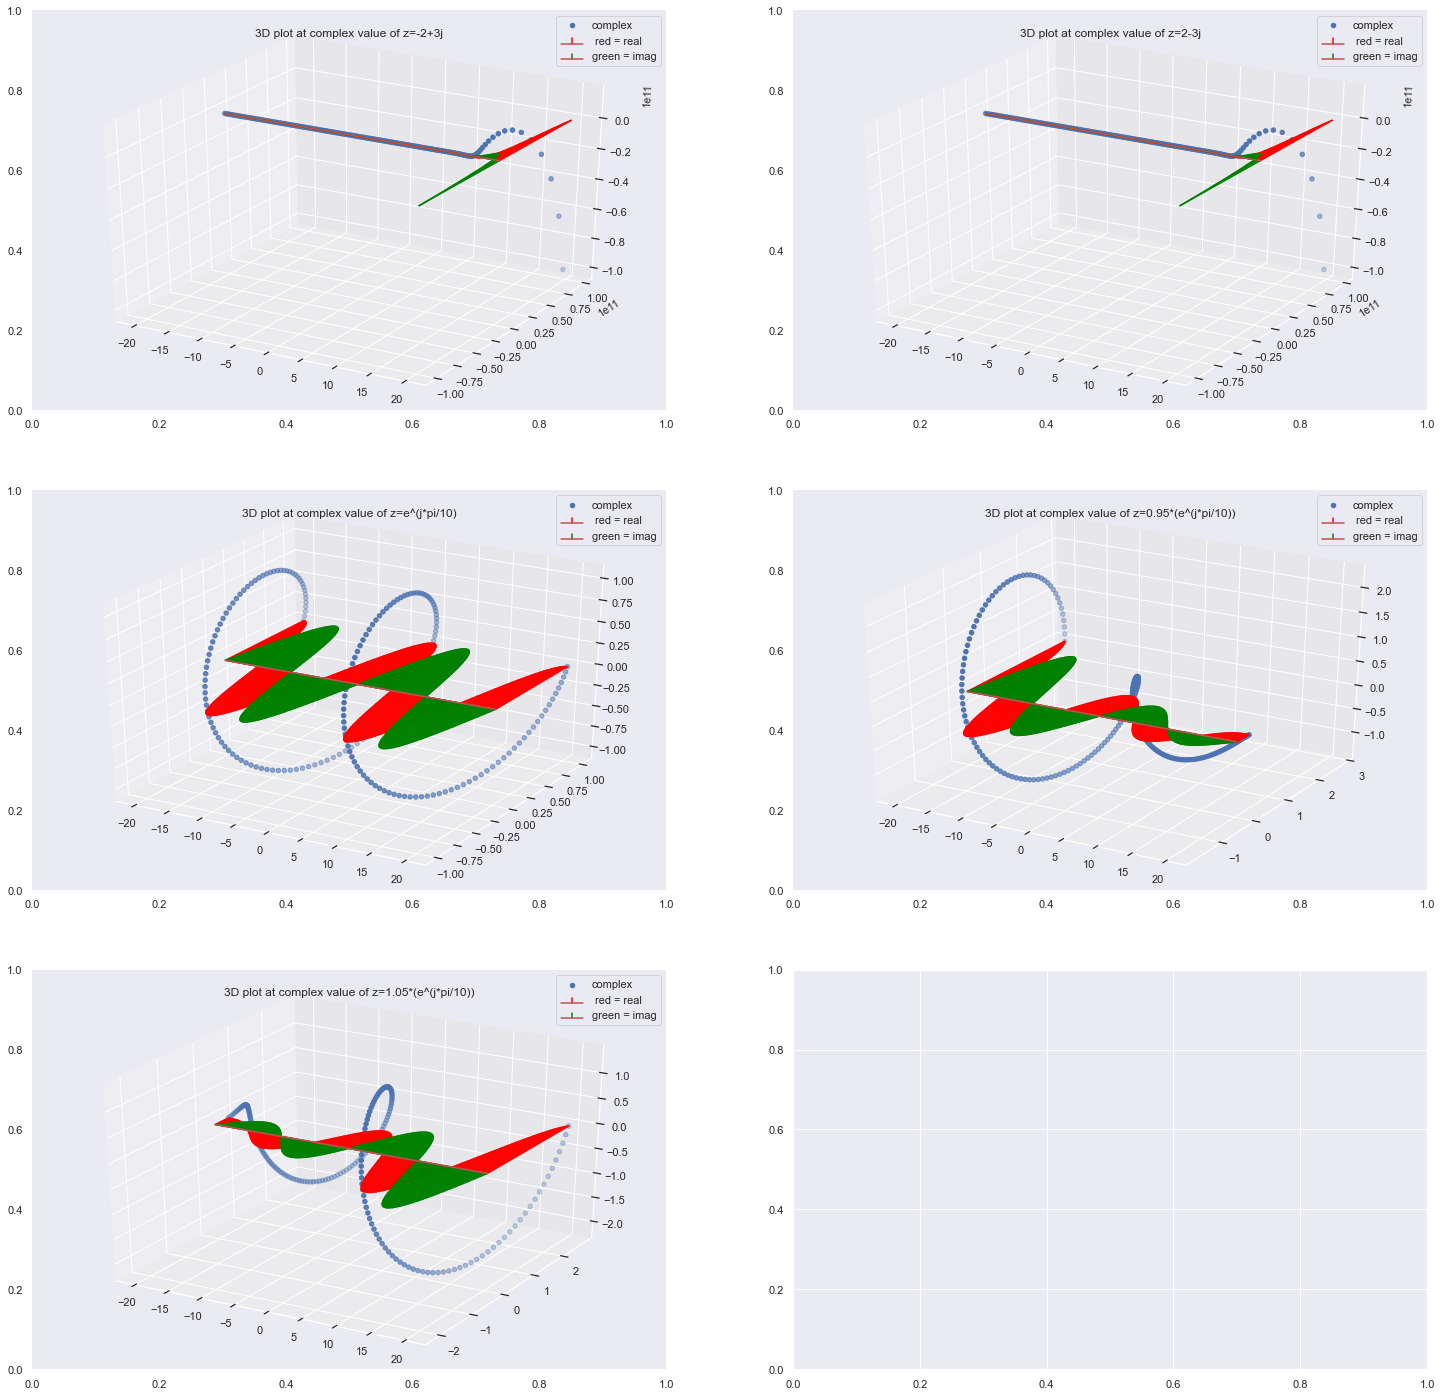

In [60]:
mag = [3.606,3.606,1,0.95,1.05]
data = [np.exp(-1j*0.9827),np.exp(-1j*0.9827),np.exp(1j*np.pi/10),np.exp(1j*np.pi/10),np.exp(1j*np.pi/10)]
name = ["-2+3j","2-3j","e^(j*pi/10)","0.95*(e^(j*pi/10))","1.05*(e^(j*pi/10))"]
n = np.linspace(-20,20,200)
fig, ax = plt.subplots(3,2,figsize=(25,25))
c = 1
for i in range(len(mag)):
    ax = fig.add_subplot(3,2, c, projection='3d')
    real = [((mag[i]*data[i])**j).real for j in n ]
    imag =  [((mag[i]*data[i])**j).imag for j in n ]
    x = np.asarray(real)
    y = np.asarray(imag)
    ax.scatter3D(n,x,y,'blue',label ="complex")
    ax.set_title("3D plot at complex value of z="+str(name[i]))
    plt.stem(n,x,'red',label = " red = real",markerfmt='red')
    plt.stem(n,y,'green',label="green = imag",markerfmt='green')
    plt.legend()
    c = c+1


#### c) Compute the Z Transform for the basic signals:
δ[n],
u[n], 
r[n], 
α^n(u[n]),
n(α^n)(u[n]), 
(r^n)(cosω0nu[n]).
Choose specific values for each and visualize the magnitude and phase spectrums. 

In [61]:
w = np.arange(-np.pi,np.pi,0.05)
# taking r = 0.5 and a = 0.75
x1 = 1
x2 = 1/(1-0.5*np.exp(w*-1j))
x3 = (0.5*np.exp(w*-1j))/(1-0.5*np.exp(w*-1j)**2)
x4 = 1/(1-(0.75*0.5*np.exp(w*-1j)))
x5 = (0.75*0.5*np.exp(w*-1j))/(1-0.75*0.5*np.exp(w*-1j)**2)
x6 =  (1 - 0.75*0.5*np.exp(w*-1j)*np.cos(1.5))/(1 - 2*0.75*(0.5*np.exp(w*-1j))*np.cos(0.75) + (0.75**(-2))*(0.5*np.exp(w*-1j)**2))


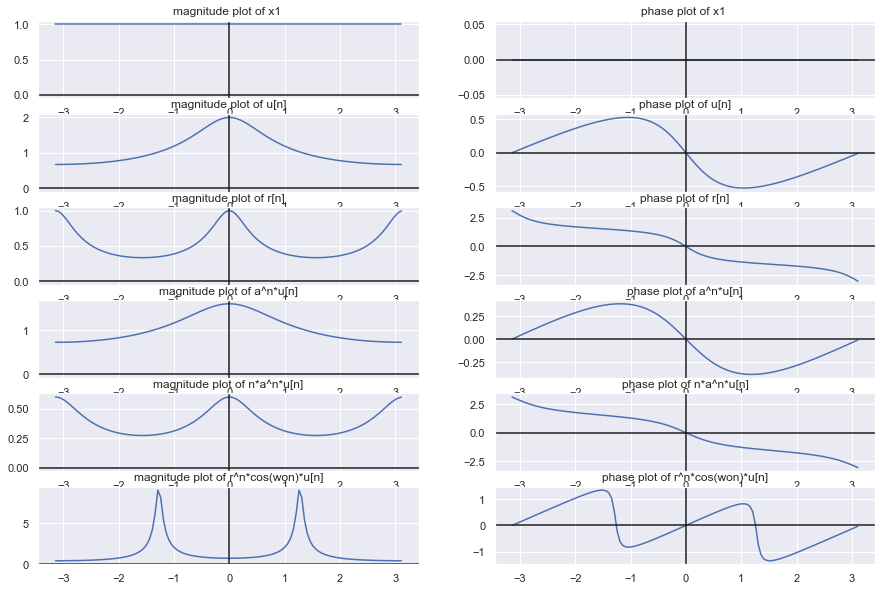

In [63]:
mag1 = [1 for i in range(len(w))]
ph = [0 for i in range(len(w))]
delta =[mag1,ph]
na = ["magnitude","phase"]
fig, axs = plt.subplots(6, 2,figsize=(15,10))
c=1
for i in range(2):
    plt.subplot(6,2,c)
    mag1 = [1 for i in range(len(w))]
    ph = [0 for i in range(len(w))]
    plt.plot(w,delta[i])
    plt.title(str(na[i])+" plot of x1 ")
    plt.axhline(y=0,color='k')
    plt.axvline(x=0,color='k')
    c = c+1

lst = [x2,x3,x4,x5,x6]
name = ["u[n]","r[n]","a^n*u[n]","n*a^n*u[n]","r^n*cos(won)*u[n]"]
c = 3
for i in range(len(lst)):
    x = lst[i]
    magn = []
    pha =[] 
    for j in range(len(w)):
        r,theta = cmath.polar(x[j])
        magn.append(r)
        pha.append(theta)
    total = [magn,pha]
    for k in range(len(total)):
        plt.subplot(6,2,c)
        plt.plot(w,total[k])
        plt.title(str(na[k])+" plot of "+str(name[i]))
        plt.axhline(y=0,color='k')
        plt.axvline(x=0,color='k')
        c = c+1 


#### d) Also plot the poles and zeros with the ROC.  For which values if any the Z Transform doesnot exist? Try finding out the Z Transform outside the ROC.


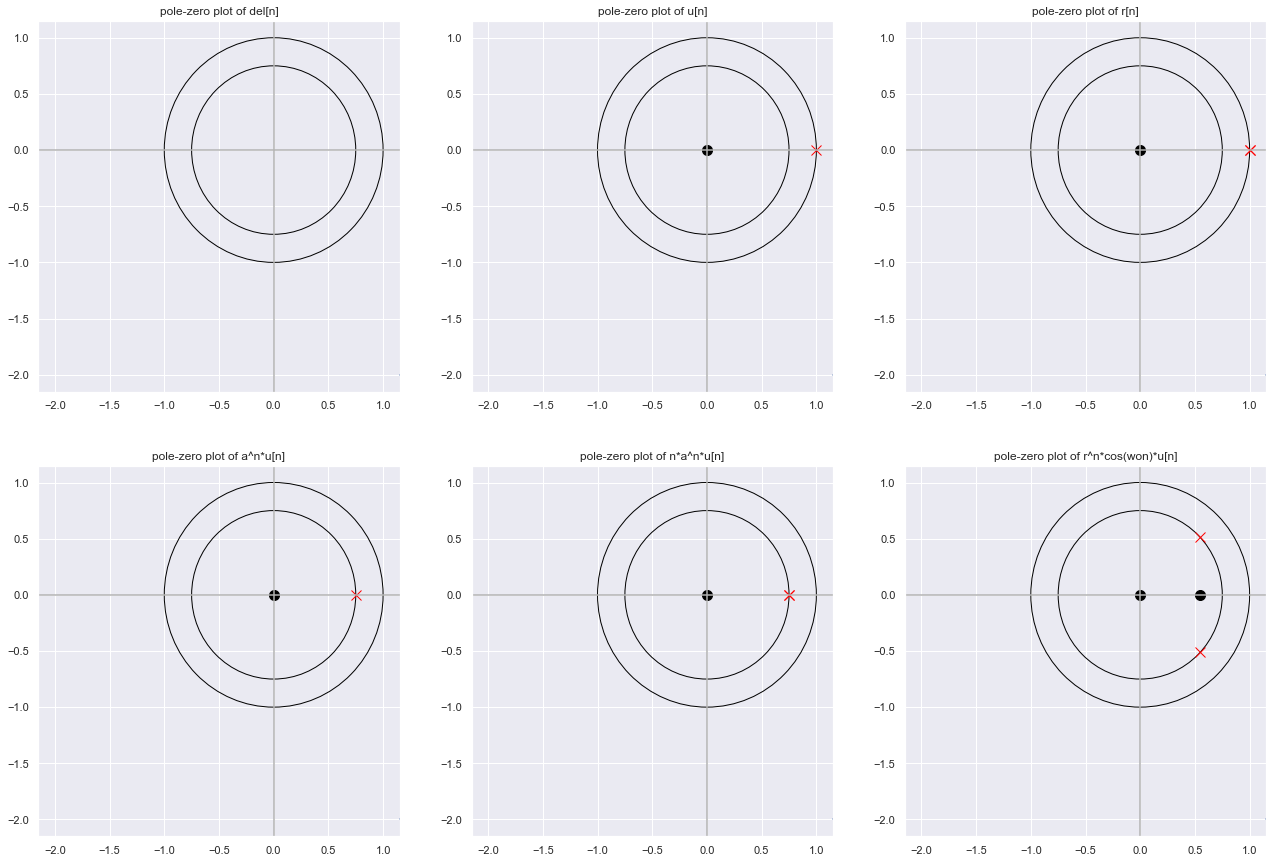

In [64]:
zeros = [[1], [1,0], [1,0], [1,0], [0.75,0], [1,-0.75*np.cos(0.75),0]]
poles = [[1], [1,-1],[1,-2,1], [1,-0.75], [1,-1.5,0.5625], [1,-1.5*np.cos(0.75),0.5625]]

fig, axs = plt.subplots(2,3,figsize=(22,15))
name = ["del[n]","u[n]","r[n]","a^n*u[n]","n*a^n*u[n]","r^n*cos(won)*u[n]"]
c = 1
for i in range(6):
    p = np.roots(poles[i])
    z = np.roots(zeros[i])
    plt.subplot(2,3,c) 
    for j in range(len(p)):
        plt.plot(p[j].real, p[j].imag, 'x', markersize=10, alpha=1,color="red")
    for j in range(len(z)):
        plt.plot(z[j].real, z[j].imag,  'o', markersize=10, alpha=1,markeredgecolor='black',color="black")
    plt.title("pole-zero plot of "+str(name[i]))
    ax = fig.gca()
    unit = patches.Circle((0,0),radius=1,fill=None,color='black',ls='solid',alpha=1)
    unit1 = plt.Circle((0,0),radius=0.75,fill=None,color='black',ls='solid',alpha=1)
    ax.add_patch(unit)
    ax.add_patch(unit1)
    plt.axhline(0,color='0.7')
    plt.axvline(0,color='0.7')
    plt.axhline(-2,2)
    plt.axvline(-2,2)
    c = c+1

## [2]  Discrete Time Fourier Series (DTFS) :

#### a) The DTFS coefficients of a periodic discrete time signal with period N = 5 are given below: a0 = 1, a2 =a^∗(−2)= e^jπ/4 ,a4 = a^∗(−4) = 2ejπ/3 Using the properties of DTFS, determine the values of a0 through a4. Using these coefficients, determine one period of the signal and display a labelled plot.

The values of x_0 = (2.707106781186548+2.4391575887554247j)
The values of x_1 = (1.9686068608724734-0.5722578466757501j)
The values of x_2 = (2.100063450723674-2.4430342904760938j)
The values of x_3 = (-1.2810814150247491+0.07753323803676881j)
The values of x_4 = (-0.4946956777579463+0.49860131035965205j)


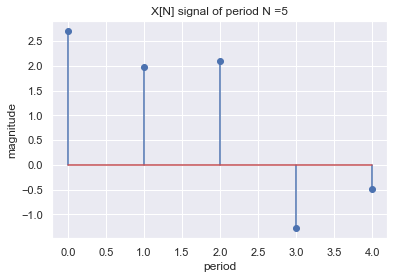

In [65]:
def coeffi(N):
    coeff = [1,0,np.exp(1j*(np.pi/4)),0,2*np.exp(1j*(np.pi/3))]
    n = np.arange(0,N,1)
    x =[]
    for i in n :
        c = 0 
        for k in range(len(coeff)):
            c = c +coeff[k]*np.exp(1j*k*(2*np.pi/N)*i)
        x.append(c)
        print("The values of " 'x_{0:1}'.format(i)+" =" ,x[i])
    return x 
a = coeffi(5)
plt.stem(a)
plt.title("X[N] signal of period N =5")
plt.xlabel("period")
plt.ylabel("magnitude")
plt.show()

#### b) consider a periodic square wave with fundamental period N = 16 having magnitude 1 between n = 0 and n = 7 and zero elsewhere. Make a plot of this signal over two periods in blue colour.

In [66]:
def dtfs(period,N):
    k =int(N/period)
    n = np.arange(0,N,1)
    for i in range(period):
        signal = np.array(([1]*k+[0]*k)*(i+1))    
    dt_coeff = []
    for i in range(N):
        count=0
        for k in n:
            count  =count + (signal[k]*np.exp(-1j*(2*np.pi/N)*k*i))
            total = count/N
        dt_coeff.append(total)
        cof = np.asarray(dt_coeff)
        coeff = abs(cof)
    new =[]
    n1 = np.arange(0,period*N,1)
    for i in n1:
        c = 0
        for k in range(len(coeff)):
            c = c + coeff[k]*np.exp(1j*k*(2*np.pi/8)*i)
        new.append(c)
    return signal ,coeff,new

#### c) Determine the DTFS coefficients of this signal and generate magnitude plots of the coefficients.

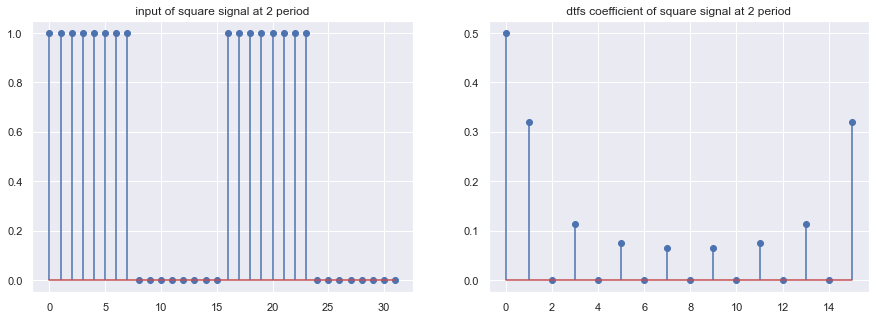

In [67]:
N = 16
period = 2
a = dtfs(period,N)
name =[" input"," dtfs coefficient"]
fig, ax = plt.subplots(1,2,figsize=(15,5))
c =1
for i in range(2):
    plt.subplot(1,2,c)
    plt.stem(a[i],use_line_collection=True)
    plt.title(str(name[i])+" of square signal at 2 period ")
    c = c+1

#### d) Using the coefficients determined above, make an approximate reconstruction of the square wave and display it on the plot of the original signal in red colour.

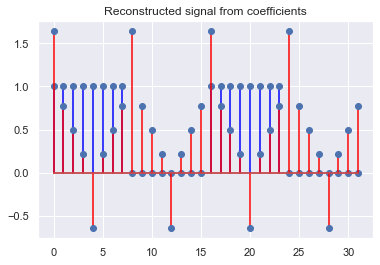

In [68]:
n = np.arange(0,period*N,1)
plt.stem(n,a[0],'blue')
plt.stem(n,a[2],'red')
plt.title("Reconstructed signal from coefficients")
plt.show()

## [3] Continuous Time Fourier Transform: (CTFT)

#### a) Consider a rectangular signal with amplitude 5 and existing between t = −1 and t = 1. Compute the continuous time Fourier transform of this signal and display a nicely labelled plot.


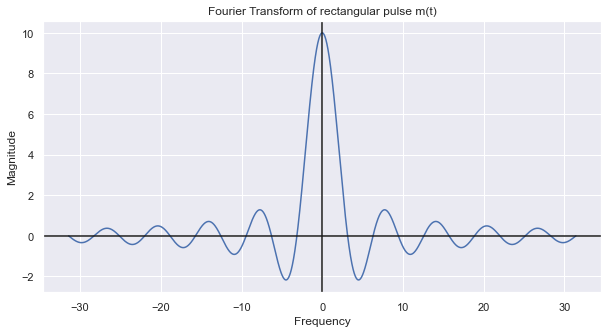

In [69]:
w = np.arange(-10*np.pi,10*np.pi,0.01)
ft = (10/w)*np.sin(w)
plt.figure(figsize=(10,5))
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Fourier Transform of rectangular pulse m(t)")
plt.plot(w,(10/w)*np.sin(w))
plt.axhline(y=0,color='k')
plt.axvline(x=0,color='k')
plt.show()

##### b) A message signal m(t) is a triangular signal existing between t = −1 and t = 1 with a peak amplitude of 1 is used to modulated a  carrier signal c(t) = cos2πfct and the resultant signal is given by y(t) = m(t)c(t). Plot y(t).

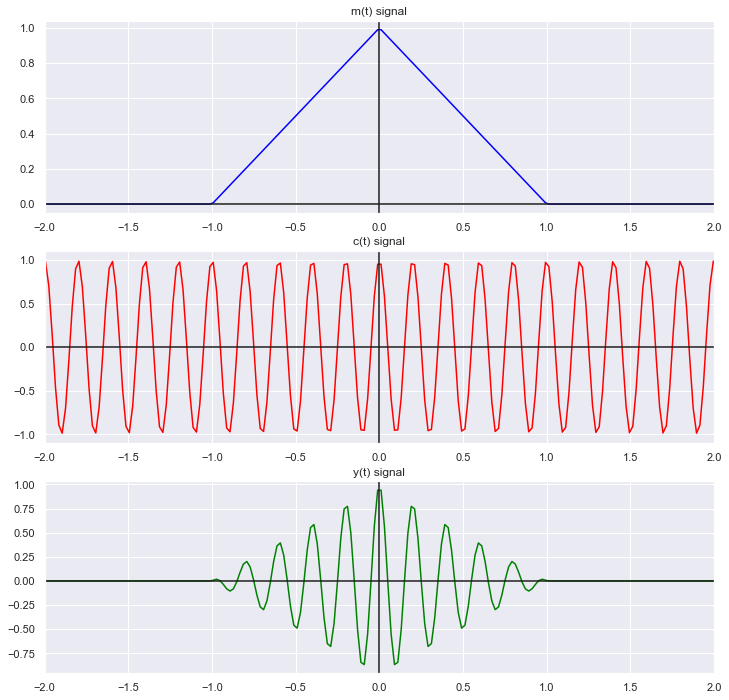

In [70]:
def modulate(time):
    def triangular(t):
        if t>=-1and t<=0:
            return (t+1)
        elif t>=0 and t<=1:
            return (-t+1)
        else:
            return 0
    m_t = [triangular(t) for t in time ] 
    c_t = np.cos(2*np.pi*2000*time)
    y_t = m_t*c_t
    return m_t,c_t,y_t
time=np.linspace(-4,4,400)

out=modulate(time) 
name = ["m(t)","c(t)","y(t)"]
col =["blue","red","green"]
fig, axs = plt.subplots(3,1, figsize=(12,12))
c =1
for i in range(3):
    plt.subplot(3,1,c)
    plt.plot(time,out[i],color = col[i])
    plt.title(str(name[i])+" signal")
    plt.xlim(-2,2)
    plt.axhline(y=0,color='k')
    plt.axvline(x=0,color='k')
    c = c+1

#### c)  Compute the Fourier transform of m(t) and y(t) and display the plots.

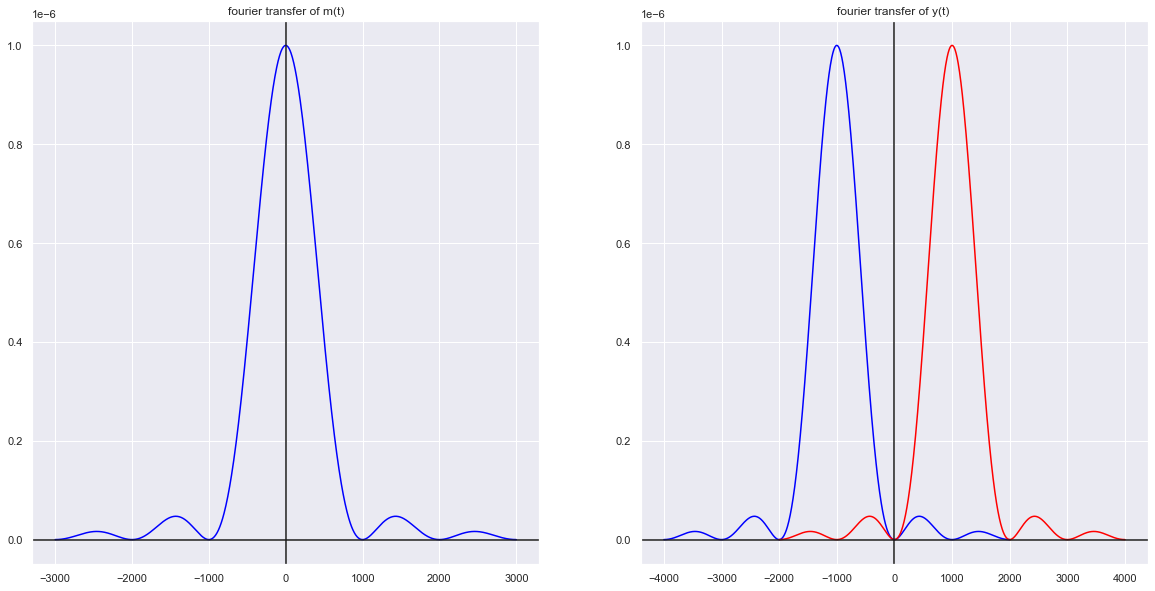

In [71]:
f=np.linspace(-3000,3000,1000)
y=(np.sin(np.pi*f)/(np.pi*f))**2
fo= 1000
fig, axs = plt.subplots(1,2, figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(f,y,'blue')
plt.title('fourier transfer of m(t)')
plt.axhline(y=0,color='k')
plt.axvline(x=0,color='k')
plt.subplot(1,2,2)
plt.plot(f-fo,y,'blue')
plt.plot(f+fo,y,'red')
plt.title('fourier transfer of y(t) ')
plt.axhline(y=0,color='k')
plt.axvline(x=0,color='k')
plt.show()
    